https://www.kaggle.com/code/anthonynam/smoke-status-prediction

https://www.kaggle.com/code/mostafamohammednouh/smoker-status-prediction-eda

https://www.kaggle.com/code/arunklenin/ps3e24-eda-feature-engineering-ensemble

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.2 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 16.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
train_df = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/dsaa5002_2023fall_final_datasets/Data_Q5/Q5_train.xlsx")
test_df =  pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/dsaa5002_2023fall_final_datasets/Data_Q5/Q5_test.csv")

# EDA

In [ ]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165.0,60,81.0,0.5,0.6,1,1.0,135,...,40,75,16.5,1.0,1.0,22,25,27,0,1
1,1,70,165.0,65,89.0,0.6,0.7,2,2.0,146,...,57,126,16.2,1.0,1.1,27,23,37,1,0
2,2,20,170.0,75,81.0,0.4,0.5,1,1.0,118,...,45,93,17.4,1.0,0.8,27,31,53,0,1
3,3,35,180.0,95,105.0,1.5,1.2,1,1.0,131,...,38,102,15.9,1.0,1.0,20,27,30,1,0
4,4,30,165.0,60,80.5,1.5,1.0,1,1.0,121,...,44,93,15.4,1.0,0.8,19,13,17,0,1


In [ ]:
test_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [ ]:
train_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,149701.000000,159256.000000,159248.000000,149692.000000,159247.000000,159256.000000,149701.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,149669.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.260453,67.143662,83.002168,1.006181,1.000981,1.023974,1.023373,122.503648,...,55.852684,114.607682,14.796965,1.073850,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.824639,12.586198,8.957819,0.401921,0.392306,0.152969,0.151086,12.729315,...,13.964141,28.158931,1.431213,0.346975,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
test_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,...,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,212341.000000,44.426538,165.221322,67.125618,82.999892,1.004776,0.999483,1.024216,1.023980,122.475403,...,127.406203,55.922286,114.597404,14.793354,1.072798,0.892463,25.559616,26.565427,36.086888,0.195458
std,30649.072052,11.897138,8.837065,12.586569,8.946584,0.397690,0.385752,0.153719,0.152988,12.765542,...,66.352488,14.000552,26.943401,1.434296,0.340818,0.179927,9.504442,17.944195,30.928138,0.396555
min,159256.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,8.000000,18.000000,1.000000,5.000000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000
25%,185798.500000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000
50%,212341.000000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,114.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000
75%,238883.500000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,164.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000
max,265426.000000,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,...,548.000000,148.000000,1220.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000


the information from trai_df like the one from test_df, so we just need to remove the NAN.

In [ ]:
train_df.isna().sum()

id                        0
age                       0
height(cm)             9555
weight(kg)                0
waist(cm)                 8
eyesight(left)         9564
eyesight(right)           9
hearing(left)             0
hearing(right)         9555
systolic                  0
relaxation                0
fasting blood sugar       0
Cholesterol               0
triglyceride              0
HDL                       0
LDL                       0
hemoglobin                0
Urine protein          9587
serum creatinine          0
AST                       0
ALT                       0
Gtp                       0
dental caries             0
smoking                   0
dtype: int64

In [ ]:
train_df.shape

(159256, 24)

In [ ]:
# 删除包含缺失值的行
train_df = train_df.dropna()

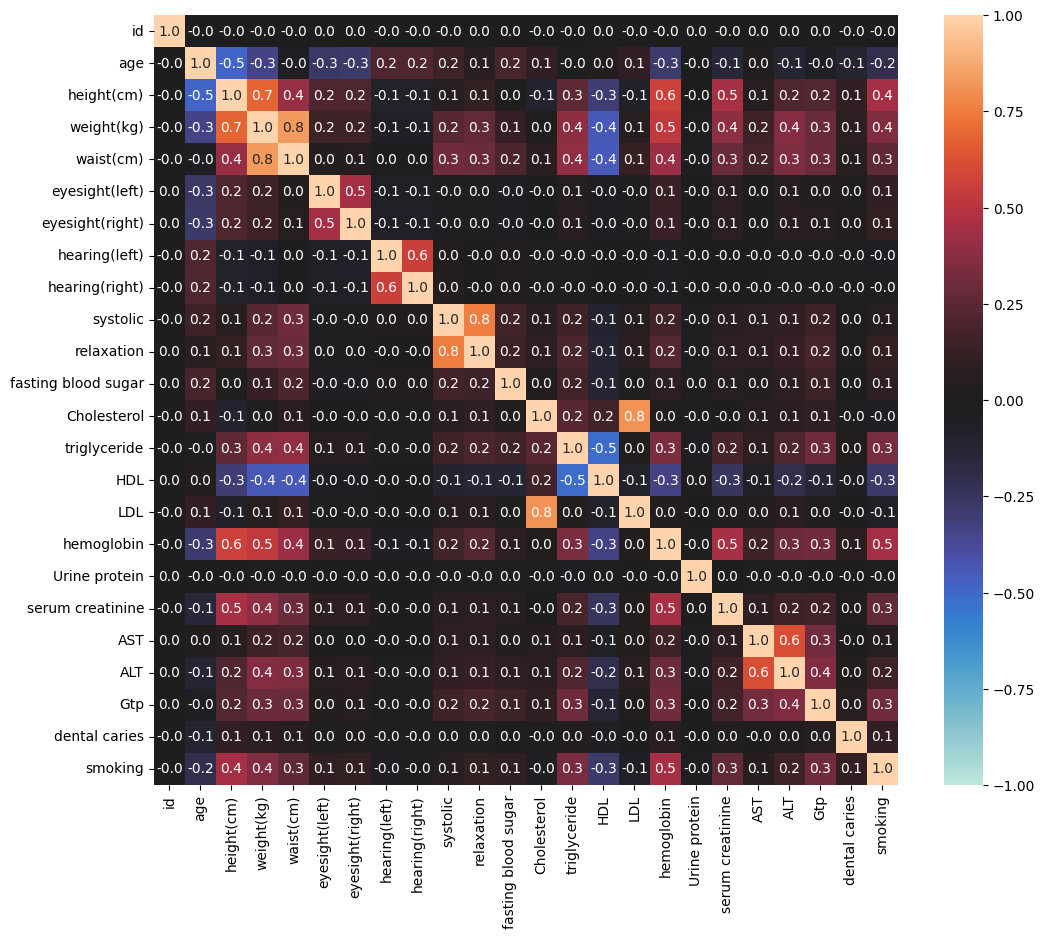

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(),
            annot = True,
            fmt='.1f',
            vmin=-1,
            vmax=1,
            center=0)
plt.show()

From the correlation heatmap above, we can see that tthe following pairs are highly correlated:

waist(cm) and weight(kg)

height(cm) and weight(kg)

waist(cm) and weight(kg)

Cholesterol and LDL

AST and ALT


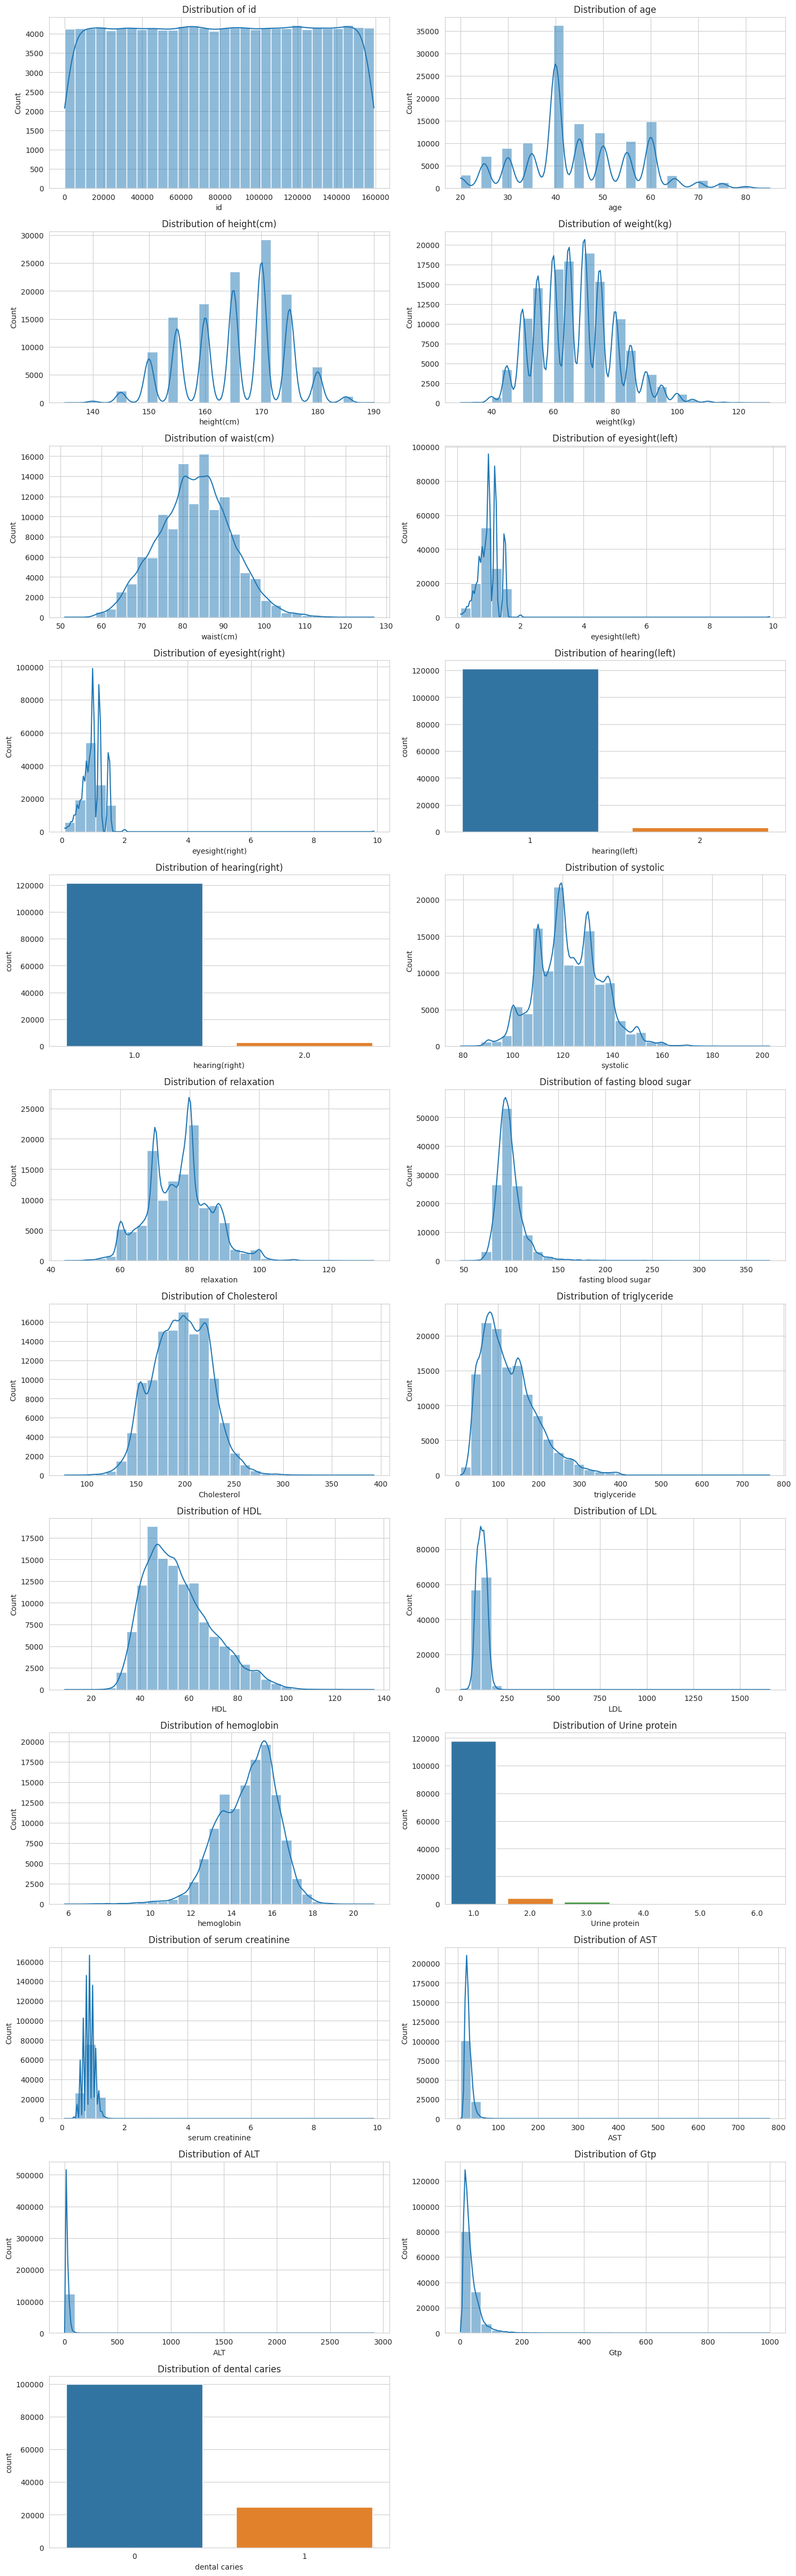

In [ ]:
sns.set_style('whitegrid')

# List of column names to plot
columns_to_plot = train_df.columns.drop(['smoking'])

num_rows = len(columns_to_plot)
plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 2, i)

    if train_df[column].nunique() <= 10:
        sns.countplot(x=column, data=train_df)
    else:
        sns.histplot(train_df[column], kde=True, bins=30)

    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

In [ ]:
Uniq_vals = train_df['smoking'].value_counts()
Uniq_vals

0    69924
1    54489
Name: smoking, dtype: int64

balanced label

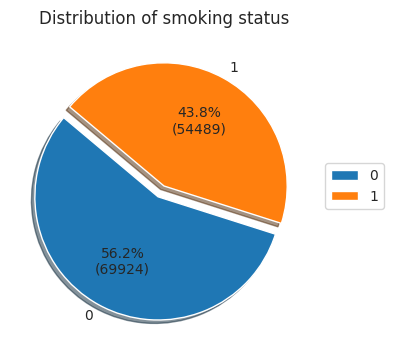

In [ ]:
LABELS = ['0', '1']

def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize =(6, 4))
ax.pie(Uniq_vals,
       labels=LABELS,
       autopct=lambda pct: func(pct, Uniq_vals),
       shadow = True,
       explode = (0.1, 0),
       startangle = 140)

ax.legend(loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax.set_title('Distribution of smoking status')
plt.show()

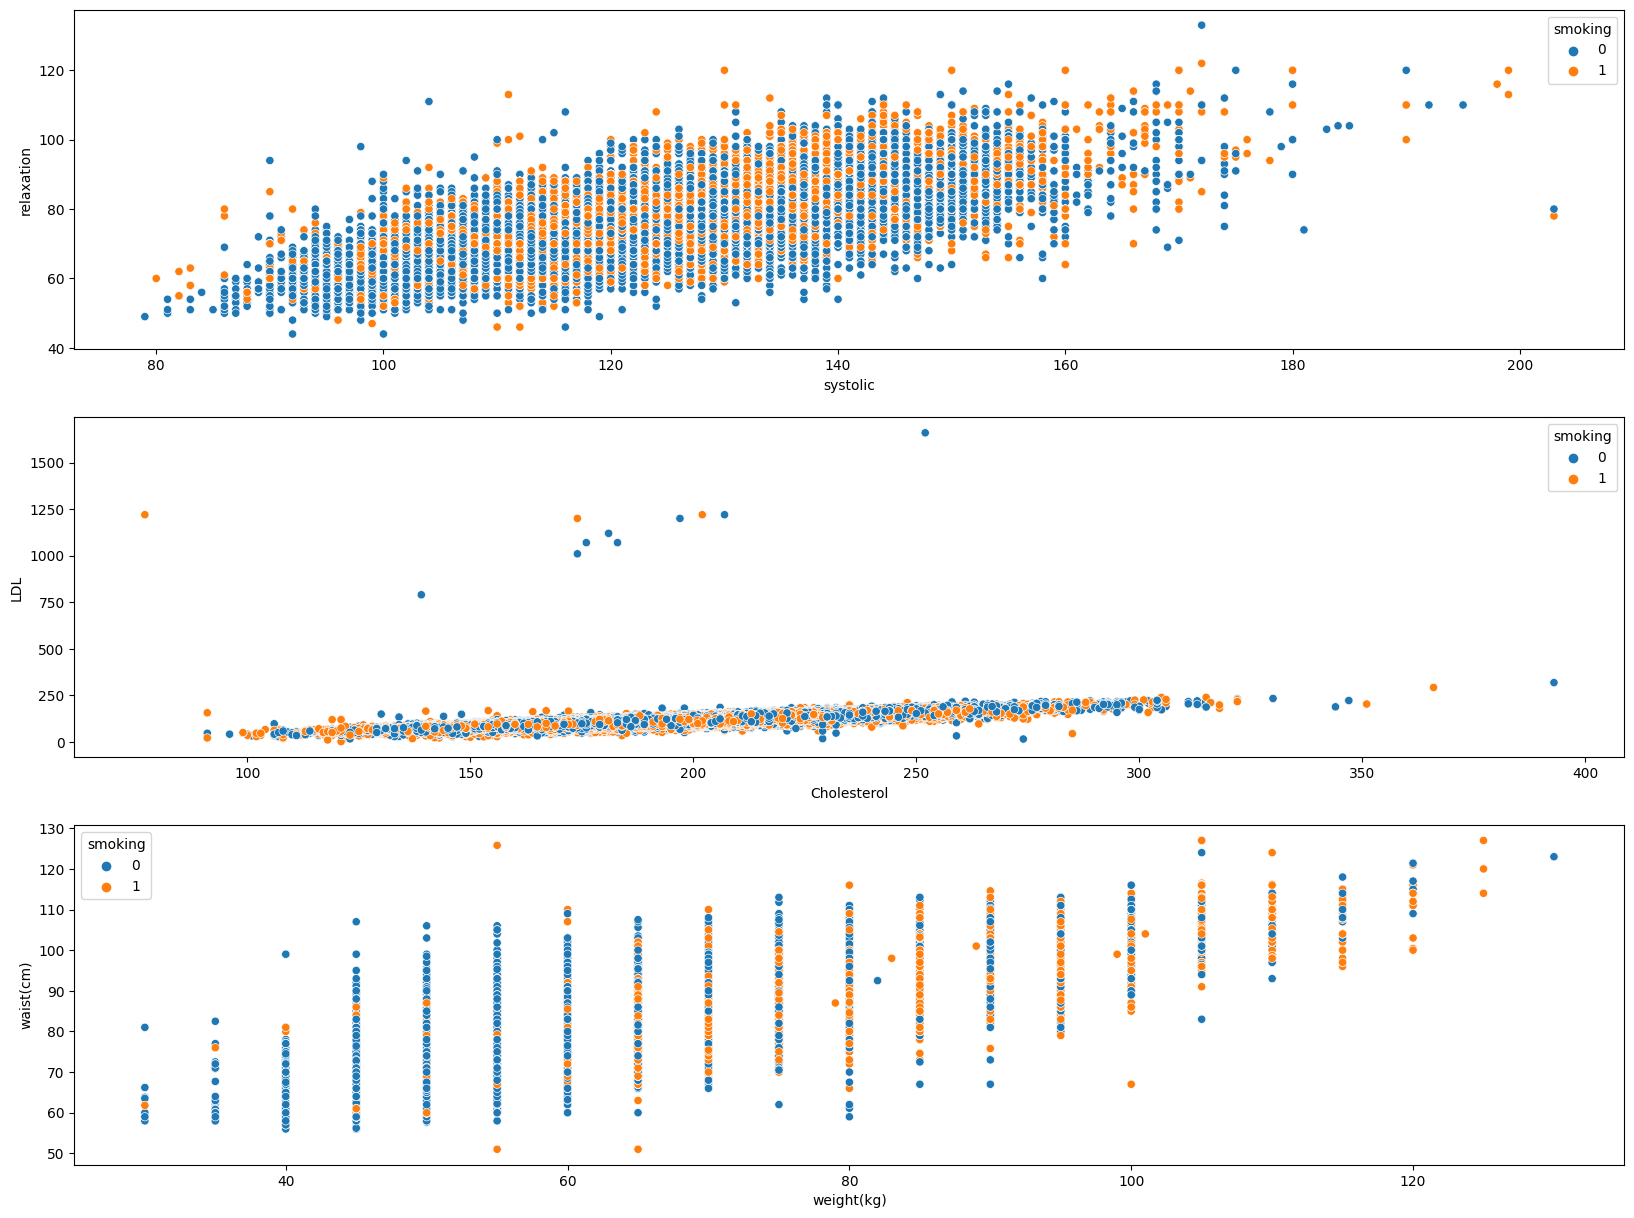

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

sns.scatterplot(ax=axes[0],
                data=train_df,
                x='systolic',
                y='relaxation',
                hue=train_df['smoking'])

sns.scatterplot(ax=axes[1],
                data=train_df,
                x='Cholesterol',
                y='LDL',
                hue=train_df['smoking'])

sns.scatterplot(ax=axes[2],
                data=train_df,
                x='weight(kg)',
                y='waist(cm)',
                hue=train_df['smoking'])

plt.show()


In [ ]:
train_df.nunique()

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
X = train_df.drop(['smoking'], axis=1)
y = train_df['smoking']

In [ ]:
SEED = np.random.seed(44)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=SEED,
                                                    shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (83356, 23)
X_test shape is  (41057, 23)
y_train shape is  (83356,)
y_test shape is  (41057,)


# XGBoost Model

In [ ]:
# Best hyperparameters for XGB Classifier
xgb_params = {'n_estimators': 727,
              'max_depth': 44,
              'min_child_weight': 42.394074475465935,
              'learning_rate': 0.018945904767046495,
              'subsample': 0.9976305222111156,
              'gamma': 0.23054785929528437,
              'colsample_bytree': 0.4156956766282452,
              'colsample_bylevel': 0.9225226228188033,
              'colsample_bynode': 0.686558727709571
             }

# Build the XGBoost model
XGBModel = XGBClassifier(**xgb_params, random_state=SEED)


In [ ]:
# Evaluate the model
cross_val_score(XGBModel, X, y, scoring='roc_auc', cv=4).mean()

0.8695248062789621

# LightGBM

In [ ]:
# Best hyperparameters for LGBM Classifier
lgbm_params = {'n_estimators': 624,
               'max_depth': 46,
               'learning_rate': 0.06953273561619135,
               'min_child_weight': 2.4187716216112944,
               'min_child_samples': 230,
               'subsample': 0.9515130309407626,
               'subsample_freq': 4,
               'colsample_bytree': 0.402284262124352,
               'num_leaves': 71
              }

# Build the LightGBM model
LGBMModel = LGBMClassifier(**lgbm_params, random_state=SEED)

In [ ]:
# Evaluate the model
cross_val_score(LGBMModel, X, y, cv=4, scoring = 'roc_auc').mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 40866, number of negative: 52443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2350
[LightGBM] [Info] Number of data points in the train set: 93309, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437964 -> initscore=-0.249428
[LightGBM] [Info] Start training from score -0.249428
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 40867, number of negative: 52443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

0.8691387378052922

# CatBoost

In [ ]:
# Build the CatBoost model
CatModel = CatBoostClassifier(iterations=1500,
                              verbose=250,
                              random_seed=SEED)


In [ ]:
# Evaluate a score by cross-validation
cross_val_score(CatModel, X, y, cv=4, scoring='roc_auc').mean()

Learning rate set to 0.049274
0:	learn: 0.6691103	total: 57.7ms	remaining: 1m 26s
250:	learn: 0.4389798	total: 2.61s	remaining: 13s
500:	learn: 0.4262237	total: 4.83s	remaining: 9.63s
750:	learn: 0.4157808	total: 7.36s	remaining: 7.34s
1000:	learn: 0.4066897	total: 9.82s	remaining: 4.9s
1250:	learn: 0.3981422	total: 12s	remaining: 2.39s
1499:	learn: 0.3904913	total: 14.2s	remaining: 0us
Learning rate set to 0.049274
0:	learn: 0.6678440	total: 9.76ms	remaining: 14.6s
250:	learn: 0.4376998	total: 2.29s	remaining: 11.4s
500:	learn: 0.4248464	total: 4.51s	remaining: 8.99s
750:	learn: 0.4141572	total: 6.99s	remaining: 6.97s
1000:	learn: 0.4050097	total: 9.43s	remaining: 4.7s
1250:	learn: 0.3962047	total: 11.7s	remaining: 2.32s
1499:	learn: 0.3881355	total: 13.9s	remaining: 0us
Learning rate set to 0.049274
0:	learn: 0.6680684	total: 9.72ms	remaining: 14.6s
250:	learn: 0.4394633	total: 2.25s	remaining: 11.2s
500:	learn: 0.4257884	total: 4.48s	remaining: 8.93s
750:	learn: 0.4151844	total: 6.9

0.8662158517499438

#Make predictions

In [ ]:
# Fit XGBoost Model
XGBModel.fit(X_train, y_train)
# predict X_test
y_pred = XGBModel.predict(X_test)
y_pred[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
y_pred_proba = XGBModel.predict_proba(X_test)[:, 1]
y_pred_proba[:10]

array([0.79060286, 0.01254338, 0.82613754, 0.0571245 , 0.69423306,
       0.8832654 , 0.7941167 , 0.01314897, 0.4387663 , 0.6193527 ],
      dtype=float32)

In [ ]:
# Calculate ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.87


In [ ]:
print(f' F1 Score : {f1_score(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

 F1 Score : 0.7653028861401839
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     23164
           1       0.73      0.81      0.77     17893

    accuracy                           0.78     41057
   macro avg       0.78      0.79      0.78     41057
weighted avg       0.79      0.78      0.78     41057



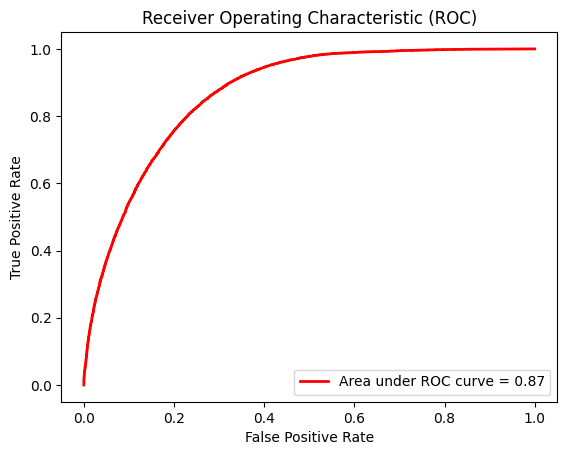

In [ ]:
def plot_roc_curve(y_test, y_pred_proba):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, color='red', lw=2, label='Area under ROC curve = %0.2f' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test, y_pred_proba)

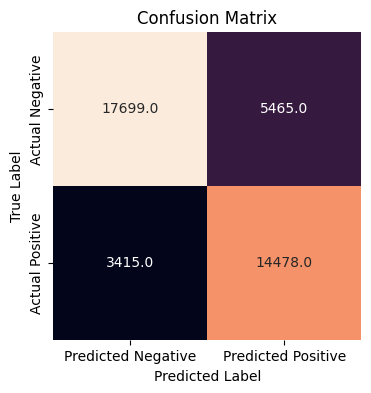

In [ ]:
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(CM,
            annot=True,
            fmt=".1f",
            square=True,
            cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Add Preprocessing

In [ ]:
only_train_df = train_df.copy()
train_df= train_df.drop(['id'],axis=1)
y = train_df['smoking']

In [ ]:
def create_extra_features(df):
    # order the ears
    best = np.where(df['hearing(left)'] < df['hearing(right)'],
                    df['hearing(left)'],  df['hearing(right)'])
    worst = np.where(df['hearing(left)'] < df['hearing(right)'],
                     df['hearing(right)'],  df['hearing(left)'])
    df['hearing(left)'] = best - 1
    df['hearing(right)'] = worst - 1

    # order the eyes - eyesight is worst to best, and 9+ should be worst!
    df['eyesight(left)'] = np.where(df['eyesight(left)'] > 9, 0, df['eyesight(left)'])
    df['eyesight(right)'] = np.where(df['eyesight(right)'] > 9, 0, df['eyesight(right)'])
    best = np.where(df['eyesight(left)'] < df['eyesight(right)'],
                    df['eyesight(left)'],  df['eyesight(right)'])
    worst = np.where(df['eyesight(left)'] < df['eyesight(right)'],
                     df['eyesight(right)'],  df['eyesight(left)'])
    df['eyesight(left)'] = best
    df['eyesight(right)'] = worst
    ##
    df['Gtp'] = np.clip(df['Gtp'], 0, 300)
    df['HDL'] = np.clip(df['HDL'], 0, 110)
    df['LDL'] = np.clip(df['LDL'], 0, 200)
    df['ALT'] = np.clip(df['ALT'], 0, 150)
    df['AST'] = np.clip(df['AST'], 0, 100)
    df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 3)

create_extra_features(train_df)
create_extra_features(test_df)

In [ ]:
test_id = test_df['id']

In [ ]:
train_to_scale = train_df.drop(['hearing(left)', 'hearing(right)', 'Urine protein','dental caries', 'smoking'],axis =1)
train_to_ohe = train_df[['hearing(left)', 'hearing(right)', 'Urine protein','dental caries']]
test_to_scale = test_df.drop(['id','hearing(left)', 'hearing(right)', 'Urine protein','dental caries'],axis =1)
test_to_ohe = test_df[['hearing(left)', 'hearing(right)', 'Urine protein','dental caries']]

Robustscaler

In [ ]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
scaled_train = pd.DataFrame(sc.fit_transform(train_to_scale),columns = train_to_scale.columns)
scaled_test = pd.DataFrame(sc.transform(test_to_scale),columns = test_to_scale.columns)

In [ ]:
scaled_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
0,1.000000,0.0,-0.333333,-0.166667,-0.8,-1.333333,0.8750,0.750000,-0.153846,-0.571429,2.102273,-0.736842,-1.026316,0.75,0.5,-0.222222,0.1875,0.000000
1,2.000000,0.0,0.000000,0.500000,-0.6,-1.000000,1.5625,0.416667,3.923077,-0.047619,-0.681818,0.157895,0.315789,0.60,1.0,0.333333,0.0625,0.384615
2,-1.333333,0.5,0.666667,-0.166667,-1.0,-1.666667,-0.1875,-0.250000,-1.307692,-0.428571,0.931818,-0.473684,-0.552632,1.20,-0.5,0.333333,0.5625,1.000000
3,-0.333333,1.5,2.000000,1.833333,0.6,1.666667,0.6250,0.833333,-0.384615,-0.380952,1.000000,-0.842105,-0.315789,0.45,0.5,-0.444444,0.3125,0.115385
4,-0.666667,0.0,-0.333333,-0.208333,0.2,1.666667,0.0000,-0.166667,-0.384615,-0.976190,-0.318182,-0.526316,-0.552632,0.20,-0.5,-0.555556,-0.5625,-0.384615


In [ ]:
scaled_trainscaled_train = scaled_train.drop('id', axis=1)

One Hot Encoding the categorical columns

In [ ]:
train_to_ohe.columns

Index(['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'], dtype='object')

In [ ]:
ohe_train = pd.get_dummies(train_to_ohe, columns = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'])
ohe_test  = pd.get_dummies(test_to_ohe, columns = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'])
ohe_train.head()

,hearing(left)_0.0,hearing(left)_1.0,hearing(right)_0.0,hearing(right)_1.0,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0,dental caries_1
0,1,0,1,0,1,0,0,0,0,0,1,0
1,0,1,0,1,1,0,0,0,0,0,0,1
2,1,0,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,0,1
4,1,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
for i in ohe_train.columns :
    ohe_train[i] = ohe_train[i].apply(lambda x :0.9 if x ==1 else 0.1)

In [ ]:
ohe_train.head()

,hearing(left)_0.0,hearing(left)_1.0,hearing(right)_0.0,hearing(right)_1.0,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0,dental caries_1
0,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1
1,0.1,0.9,0.1,0.9,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.9
2,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1
3,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.9
4,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1


Joining the columns after scaling and one-hot encoding

In [ ]:
ohe_train = ohe_train.reset_index(drop = True)
ohe_test = ohe_test.reset_index(drop = True)
ohe_train.head()

,hearing(left)_0.0,hearing(left)_1.0,hearing(right)_0.0,hearing(right)_1.0,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0,dental caries_1
0,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1
1,0.1,0.9,0.1,0.9,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.9
2,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1
3,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.9
4,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.9,0.1


In [ ]:
scaled_train  = scaled_train.reset_index(drop =True)
scaled_test  = scaled_test.reset_index(drop =True)
y = y.reset_index(drop = True)
X_train = pd.concat([ohe_train,scaled_train,y],axis =1)
test_df = pd.concat([ohe_test,scaled_test],axis =1)
X_train.head()

,hearing(left)_0.0,hearing(left)_1.0,hearing(right)_0.0,hearing(right)_1.0,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,...,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking
0,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,...,-0.571429,2.102273,-0.736842,-1.026316,0.75,0.5,-0.222222,0.1875,0.000000,1
1,0.1,0.9,0.1,0.9,0.9,0.1,0.1,0.1,0.1,0.1,...,-0.047619,-0.681818,0.157895,0.315789,0.60,1.0,0.333333,0.0625,0.384615,0
2,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,...,-0.428571,0.931818,-0.473684,-0.552632,1.20,-0.5,0.333333,0.5625,1.000000,1
3,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,...,-0.380952,1.000000,-0.842105,-0.315789,0.45,0.5,-0.444444,0.3125,0.115385,0
4,0.9,0.1,0.9,0.1,0.9,0.1,0.1,0.1,0.1,0.1,...,-0.976190,-0.318182,-0.526316,-0.552632,0.20,-0.5,-0.555556,-0.5625,-0.384615,1


In [ ]:
test_df.head()

,hearing(left)_0,hearing(left)_1,hearing(right)_0,hearing(right)_1,Urine protein_1,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,...,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
0,1,0,1,0,1,0,0,0,0,0,...,0.846154,0.095238,0.806818,-0.263158,0.026316,-0.40,0.0,-0.555556,0.1875,0.192308
1,0,1,0,1,1,0,0,0,0,0,...,-0.230769,-0.571429,0.488636,-1.000000,-0.263158,-1.00,1.0,-0.444444,-0.6250,-0.115385
2,1,0,1,0,1,0,0,0,0,0,...,-0.307692,-0.833333,0.659091,-0.789474,-0.684211,0.20,2.5,1.555556,2.3750,0.346154
3,1,0,1,0,1,0,0,0,0,0,...,-0.384615,0.404762,-0.772727,1.105263,0.368421,-0.25,-1.5,0.111111,-0.2500,-0.653846
4,1,0,1,0,1,0,0,0,0,0,...,-1.307692,-0.619048,-0.170455,-0.789474,0.236842,0.75,0.5,0.666667,1.0625,0.000000


Tomek Links : Downsampling for getting balanced dataset

In [ ]:
X_train['smoking'].value_counts()

0    69924
1    54489
Name: smoking, dtype: int64

In [ ]:
from imblearn.under_sampling import TomekLinks

y = X_train[['smoking']]
X = X_train.drop('smoking',axis =1)

def tomek_links (X,y) :

    tl = TomekLinks(sampling_strategy='auto')

    X_resampled, y_resampled = tl.fit_resample(X, y)

    return X_resampled , y_resampled

X_resampled, y_resampled = tomek_links (X,y)

In [ ]:
X_train = pd.concat([X_resampled,y_resampled], axis =1)
X_train['smoking'].value_counts()

0    63747
1    54489
Name: smoking, dtype: int64

In [ ]:

feature_names = X_resampled.columns.tolist()

# 更新test_df的特征名
test_df = test_df.reindex(columns=feature_names)

In [ ]:
test_df.columns

Index(['hearing(left)_0.0', 'hearing(left)_1.0', 'hearing(right)_0.0',
       'hearing(right)_1.0', 'Urine protein_1.0', 'Urine protein_2.0',
       'Urine protein_3.0', 'Urine protein_4.0', 'Urine protein_5.0',
       'Urine protein_6.0', 'dental caries_0', 'dental caries_1', 'age',
       'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp'],
      dtype='object')

#Model Training

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

n_splits = 10

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
auc_scores = []
best_model = None
best_auc = 0.0
X = X_resampled
y = y_resampled

params = {'learning_rate': 0.019093223225293453,
            'colsample_bytree': 0.21329015151846925,
            'colsample_bylevel': 0.9148369225084079,
            'subsample': 0.8831564960046078,
            'reg_alpha': 1.1496763786731952e-05,
            'reg_lambda': 7.512814356733987e-07,
            'max_depth': 12,
            'n_estimators': 1950,
            'min_child_weight': 21,
          'tree_method': 'gpu_hist',
          'eval_metric': 'auc',
          'booster': 'gbtree',
          'n_jobs': -1,
          'verbosity': 0}

# Wrap the loop with tqdm for a progress bar
for train_index, test_index in tqdm(skf.split(X, y), total=n_splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = xgb.XGBClassifier(**params)

    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)

    if auc > best_auc:
        best_auc = auc
        best_model = model

100%|██████████| 10/10 [02:44<00:00, 16.49s/it]


In [ ]:
print(best_auc)

0.8938614576110752


In [ ]:
print(auc_scores)

[0.887510368875023, 0.8858573798394382, 0.8935043307100782, 0.8915092317712552, 0.8876285988794491, 0.8920972439627346, 0.8938614576110752, 0.8860710315920862, 0.8898492988842599, 0.8927915982839538]


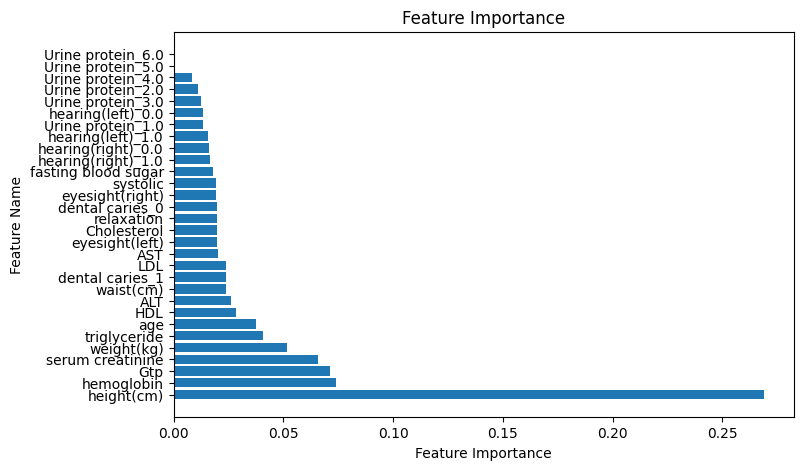

In [ ]:
import matplotlib.pyplot as plt
feature_importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(8, 5))
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

#Model Inference

In [63]:
y_pred = model.predict_proba(test_df)[:, 1]
y_pred.shape

(106171,)

In [64]:
y_pred[:5]

array([0.5420124 , 0.20298424, 0.32413158, 0.03420986, 0.6202399 ],
      dtype=float32)

In [66]:
threshold = 0.5
smoking = (y_pred >= threshold).astype(int)

In [67]:
smoking[:5]

array([1, 0, 0, 0, 1])

In [68]:
test_id.shape

(106171,)

In [69]:
smoking_df = pd.DataFrame(smoking, columns=['smoking'])

merged_df = pd.concat([test_id, smoking_df], axis=1)

In [70]:
merged_df.head()

,id,smoking
0,159256,1
1,159257,0
2,159258,0
3,159259,0
4,159260,1


In [71]:
merged_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/Q5/Q5_output.csv')